In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import ttest_rel


In [2]:
df_ids = pd.read_csv(f"../data/cache2/processed/smiles.tsv", sep='\t')
df_boltz = pd.read_csv(f"../results_summary/hmin.tsv", sep='\t')
df_boltz.columns = ["sample", "id", "affinity_probability_binary"]
df = df_ids.merge(df_boltz, on='id')
df["batch_size"] = df.apply(lambda x: x["sample"].split('_')[1], axis=1)
df["replicate"] = df["sample"].str.extract(r"r(\d)")


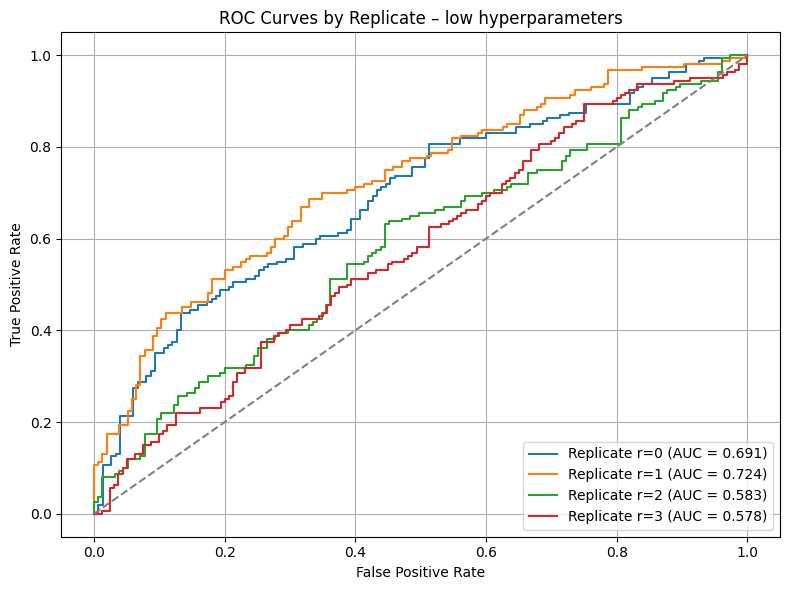

In [3]:
plt.figure(figsize=(8, 6))

roc_aucs_hmin = []
for r in range(4):
    df_r = df[df["replicate"] == str(r)]
    if df_r.empty:
        continue

    y_true = df_r["binder"].astype(int)
    y_score = df_r["affinity_probability_binary"]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"Replicate r={r} (AUC = {roc_auc:.3f})")
    roc_aucs_hmin.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Replicate – low hyperparameters")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
df_ids = pd.read_csv(f"../data/cache2/processed/smiles.tsv", sep='\t')
df_boltz = pd.read_csv(f"../results_summary/hbase.tsv", sep='\t')
df_boltz.columns = ["sample", "id", "affinity_probability_binary"]
df = df_ids.merge(df_boltz, on='id')
df["batch_size"] = df.apply(lambda x: x["sample"].split('_')[1], axis=1)
df["replicate"] = df["sample"].str.extract(r"r(\d)")


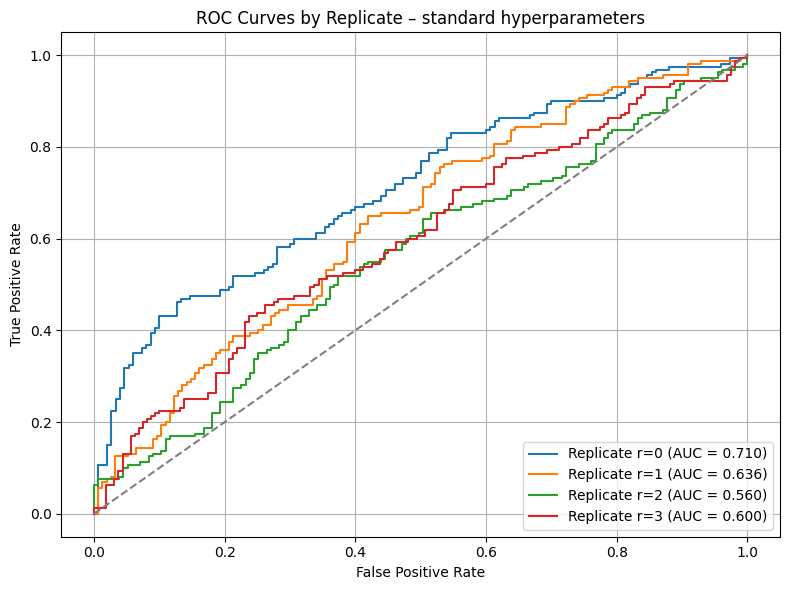

In [5]:
plt.figure(figsize=(8, 6))

roc_aucs_hbase = []
for r in range(4):
    df_r = df[df["replicate"] == str(r)]
    if df_r.empty:
        continue

    y_true = df_r["binder"].astype(int)
    y_score = df_r["affinity_probability_binary"]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"Replicate r={r} (AUC = {roc_auc:.3f})")
    roc_aucs_hbase.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Replicate – standard hyperparameters")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
t_stat, p_value = ttest_rel(roc_aucs_hmin, roc_aucs_hbase)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


t-statistic: 0.6955
p-value: 0.5368
